<a href="https://colab.research.google.com/github/AjtheXplorer/Kelompok5B/blob/main/Tugas_kelompok_5_kelas_B_(fix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas regresi data

import library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

download file dari kaggle

In [6]:
# Download latest version
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")

print("Path to dataset files:", path)


100%|██████████| 12.3k/12.3k [00:00<00:00, 17.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/the-boston-houseprice-data/versions/1


In [7]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)

Exploratpry Data Analysis

In [8]:
df = pd.read_csv(filepath)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


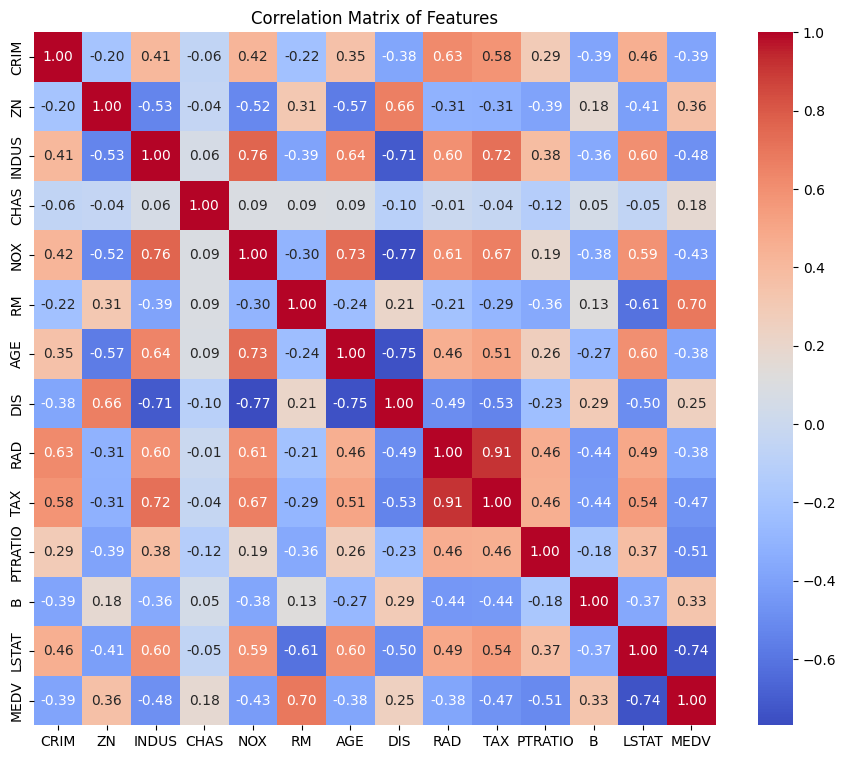

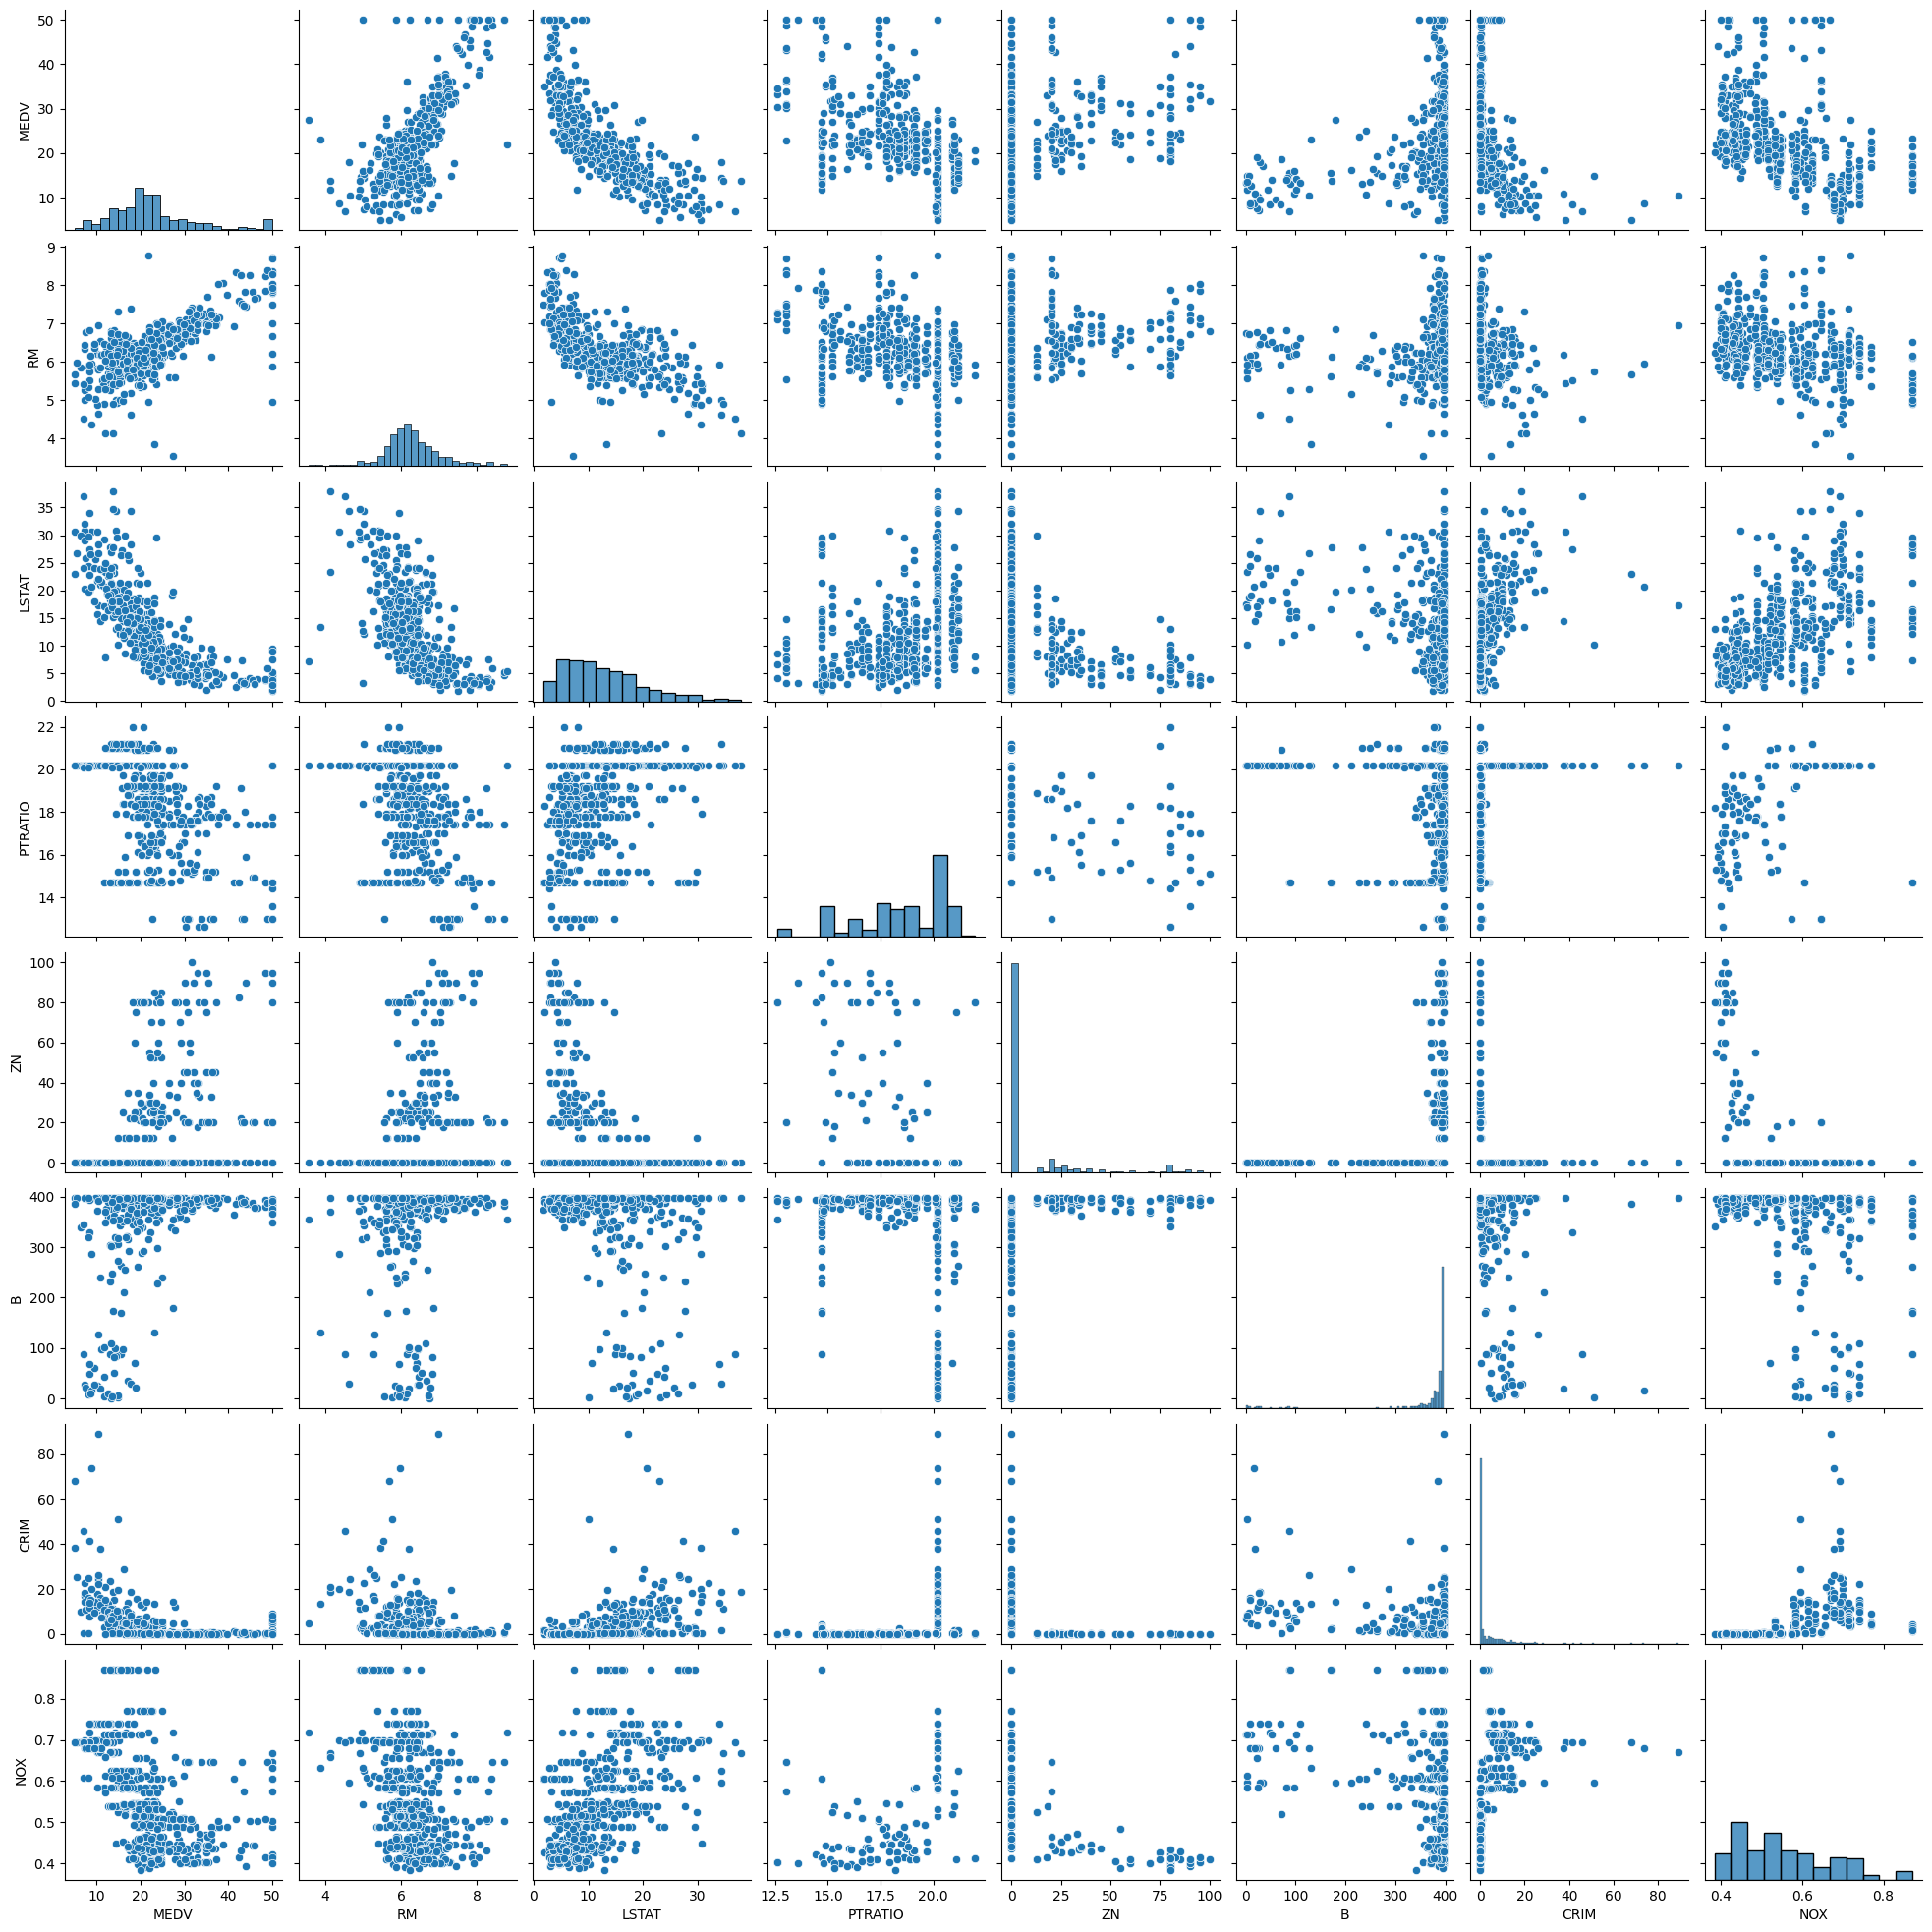

In [10]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Pairplot for selected features
selected_features = ['MEDV', 'RM', 'LSTAT', 'PTRATIO','ZN','B','CRIM','NOX']
sns.pairplot(df[selected_features])
plt.show()

Data Cleaning

In [11]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [12]:
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

In [13]:
print(df.isnull().sum())

print(df.head())
print(df.info())
print(df.describe())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   -----

In [14]:
# Menghilangkan kolom dikarenakan tidak relevan (nilai 0)
df.drop(['ZN','RAD'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   INDUS    506 non-null    float64
 2   CHAS     506 non-null    int64  
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 47.6 KB


Buat axis

In [18]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [19]:
# Membagi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membuat model LinearRegresi

In [20]:
model = LinearRegression()
print(model)

LinearRegression()


In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Buat prediksi pada data uji
y_pred = model.predict(X_test)

In [23]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 27.48689028658776
R-squared: 0.6251810679602376


masukkan data prediksi

In [25]:
data_baru = pd.DataFrame({
    'CRIM': [0.00632],
    'INDUS': [2.31],
    'CHAS': [0.0],
    'NOX': [0.538],
    'RM': [6.575],
    'AGE': [65.2],
    'DIS': [4.0900],
    'TAX': [296.0],
    'PTRATIO': [15.3],
    'B': [396.90],
    'LSTAT': [4.98]
})

harga_prediksi = model.predict(data_baru)
print(f"Harga prediksi untuk data baru: {harga_prediksi}")

Harga prediksi untuk data baru: [30.89982044]


Visualisasikan data terhadap beberapa variabel

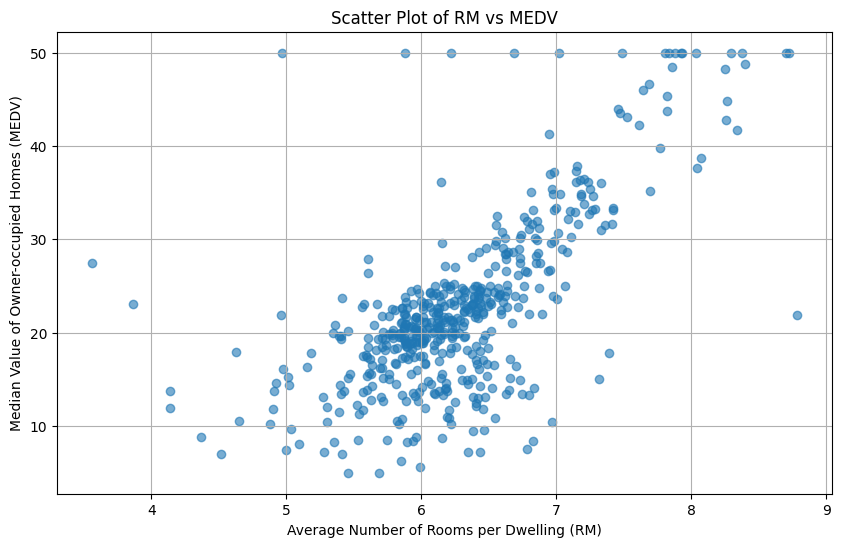

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['MEDV'], alpha=0.6)

# Contoh klasifikasi data dikarenakan nilai y_pred tidak sama dengan x, sehingga diganti dengan klasifikasi baru diatas

plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Owner-occupied Homes (MEDV)')
plt.grid(True)
plt.show()


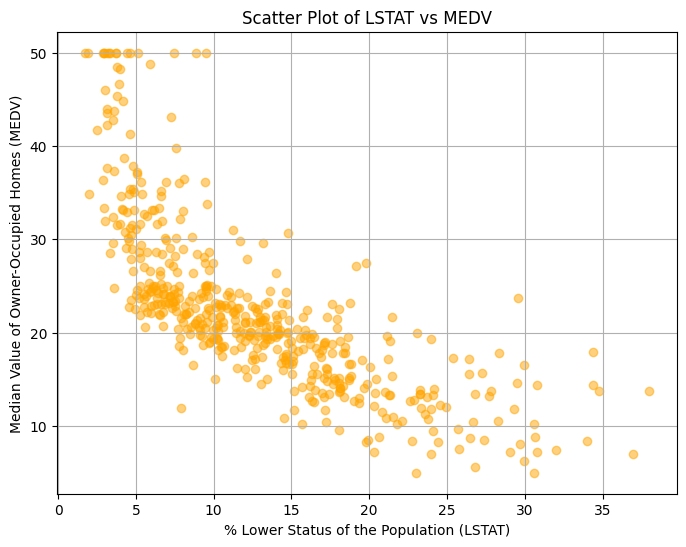

In [27]:
# Scatter plot of 'LSTAT' vs 'MEDV'
plt.figure(figsize=(8, 6))
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5, color='orange')
plt.xlabel('% Lower Status of the Population (LSTAT)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.title('Scatter Plot of LSTAT vs MEDV')
plt.grid(True)
plt.show()

Hasil analisa:
Berdasarkan hasil regresi data yang dilakukan pada dataset harga rumah di Boston, berikut adalah beberapa poin penting yang dapat disimpulkan:

1. Model Regresi Linear:

Model regresi linear digunakan untuk memprediksi nilai median harga rumah (MEDV) berdasarkan beberapa variabel independen seperti CRIM,  INDUS, CHAS, NOX, RM, AGE, DIS,  TAX, PTRATIO, B, dan LSTAT.

2. Evaluasi Model:

Mean Squared Error (MSE): 24.29. MSE adalah ukuran rata-rata kesalahan kuadrat antara nilai yang diprediksi dan nilai aktual. Semakin kecil nilai MSE, semakin baik model dalam memprediksi data.

R-squared (R²): 0.669. R² adalah ukuran seberapa baik variabel independen menjelaskan variabilitas dalam variabel dependen. Nilai R² mendekati 1 menunjukkan model yang baik.

3. Prediksi Data Baru:

Model digunakan untuk memprediksi harga rumah baru berdasarkan data input tertentu. Misalnya, untuk data baru dengan nilai CRIM: 0.00632, INDUS: 2.31, CHAS: 2.0, NOX: 0.538, RM: 6.575, AGE: 65.2, DIS: 4.0900, TAX: 296.0, PTRATIO: 15.3, B: 396.90, dan LSTAT: 4.98, model memprediksi harga rumah sebesar 35.52.

4. Analisis Scatter Plot:

Scatter plot menunjukkan hubungan antara variabel independen dan variabel dependen (MEDV).

 uji scatter plot antara LSTAT dan MEDV menunjukkan bahwa semakin tinggi persentase populasi dengan status sosial rendah (LSTAT), semakin rendah nilai median harga rumah (MEDV).

 selanjutnya uji scatter plot antara Room Number per Dwelling dan Medv adalah semakin banyak jumlah rata-rata kamar dalam sebuah rummah, semakin tinggi nilai median harga rumah tersebut
